In [1]:
# Perform absolute and relative imports for all necessary libraries, packages etc.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
# Import data, pick relevant columns and concatenate them to a single string
data = pd.read_csv("transaction_data.csv", sep = ";", index_col = 0)
X = data[["Buchungstext", "Verwendungszweck", "Beguenstigter_Zahlungspflichtiger", "Betrag"]].agg(" ".join, axis=1)
y = data[["Label"]]

In [3]:
# Split data into training & test set (X: features / y: labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2021)

In [4]:
# Apply vectorization and TF-IDF-transformation
vect = TfidfVectorizer(stop_words = get_stop_words("german"), ngram_range = (1,3))
vect.fit(X_train)
X_train_count = vect.transform(X_train)
X_test_count = vect.transform(X_test)

In [5]:
# Implement and train model
model = MultinomialNB()
model.fit(X_train_count, y_train.values.ravel())

MultinomialNB()

In [6]:
# Test predictive quality of multinomial NB classifier on test data and display summary statistics
y_predict = model.predict(X_test_count)
print(classification_report(y_test, y_predict))

                  precision    recall  f1-score   support

         finance       1.00      1.00      1.00         8
          income       1.00      1.00      1.00         5
         leisure       0.90      1.00      0.95        26
          living       1.00      0.40      0.57         5
         private       1.00      0.80      0.89         5
standardOfLiving       0.93      1.00      0.97        14

        accuracy                           0.94        63
       macro avg       0.97      0.87      0.90        63
    weighted avg       0.94      0.94      0.93        63



In [7]:
# Implement pipeline to chain multiple estimators in one and prevent data leakage from test data into training model
pipe = Pipeline([
    ("vect", TfidfVectorizer(stop_words = get_stop_words("german"), ngram_range = (1,3))),
    ("model", MultinomialNB())
])

In [9]:
# Perform cross-validation to evaluate model's ability to predict new data for more generalisable results
cross_val = cross_val_score(pipe, X, y.values.ravel(), cv = 10).mean()
print("Cross-validated accuracy score: " + str(cross_val))

SyntaxError: invalid syntax (<ipython-input-9-a4d879d10311>, line 2)

Text(32.99999999999999, 0.5, 'Predicted labels')

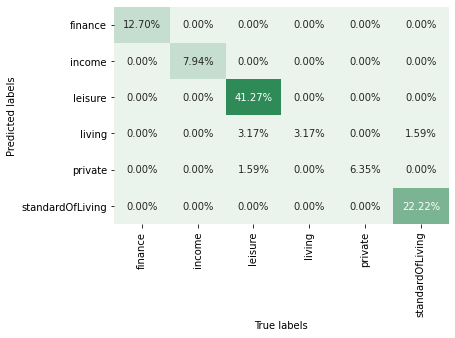

In [183]:
# Print confusion matrix with heatmap properties for more concise visualization
cf_matrix = confusion_matrix(y_test, y_predict)
labels = unique_labels(y_test)
column = [labels]
indices = [labels]
ax = plt.subplot()
table = pd.DataFrame(confusion_matrix(y_test, y_predict), columns = column, index = indices)
sns.heatmap(table/np.sum(cf_matrix), fmt = ".2%", cbar = False, annot = True, cmap = sns.light_palette("seagreen"), ax = ax)
ax.set_xlabel("True labels")
ax.set_ylabel("Predicted labels")